In [1]:
import pandas as pd
import numpy as np

In [2]:
%%time
data = pd.read_csv("2020-Feb.csv")

data['event_time'] = pd.to_datetime(data['event_time'], format='%Y-%m-%d %H:%M:%S UTC')

CPU times: user 14.5 s, sys: 474 ms, total: 15 s
Wall time: 15 s


In [3]:
data['product_id'].nunique()

48579

In [4]:
data['event_type'].value_counts()

view                1953586
cart                1148694
remove_from_cart     812409
purchase             241993
Name: event_type, dtype: int64

In [5]:
#data = data[data['event_type'] == 'purchase']

In [6]:
data['date'] = data['event_time'].dt.round("1H")

In [7]:
pur = data[data['event_type'] == 'purchase']

In [8]:
g = pur.groupby(["date"], as_index=False)['price'].sum()
g = g.rename(columns={"price": "sales_value"})

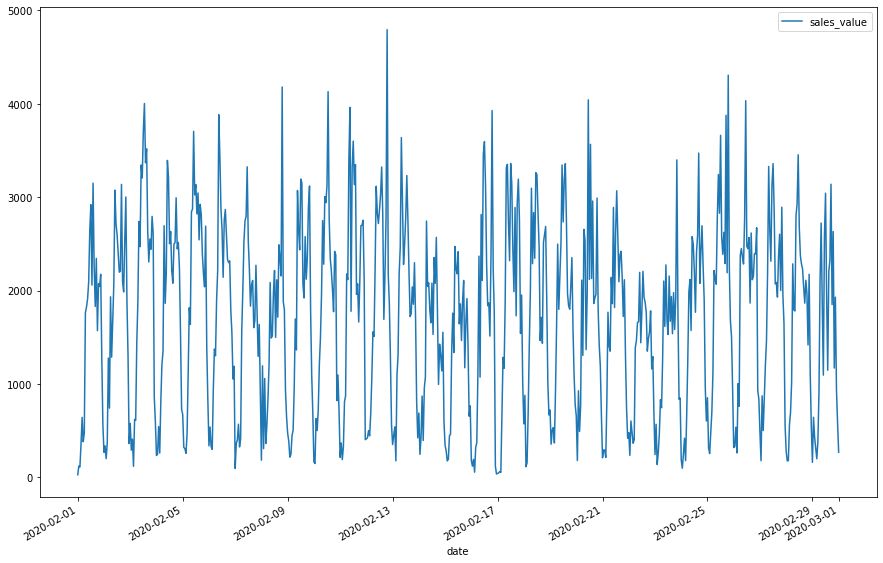

In [9]:
g.plot(x='date', y='sales_value', figsize=(15,10))

In [10]:
#g.to_feather("ts_hr_feb_2020.f")

In [11]:
g.head()

,date,sales_value
0,2020-02-01 00:00:00,28.60
1,2020-02-01 01:00:00,122.84
2,2020-02-01 02:00:00,112.87
3,2020-02-01 03:00:00,357.20
4,2020-02-01 04:00:00,642.56


In [12]:
g.to_csv('ts_hr_feb_2020.csv.zip',index=False, header=True)